# Show a better game board

Goal: Implement a better game board rendition with Matplotlib

In [82]:
from boardutilsv1 import Board, BoardMark
import numpy as np

In [83]:
# clues for mini game
clues = {
    'rows': [1, 2],
    'cols': [2, 1]
}
board = Board(clues)
board.prettyprint()
board.mark(0, 1, BoardMark.FILLER) 
board.mark(1, 1, BoardMark.BLACK) 
board.prettyprint()

cols: 2 1
rows:
1
2
[['.' '.']
 ['.' '.']]
cols: 2 1
rows:
1
2
[['.' 'x']
 ['.' 'o']]


## basic board setup

In [84]:
%matplotlib inline

In [85]:
import matplotlib.pyplot as plt

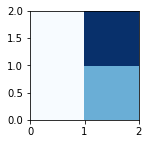

In [86]:
# start from basic example

data = board.states
# set some canvas
fig, ax = plt.subplots(figsize=(2,2))
# draw a heatmap
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# ensure square cells
ax.set_aspect("equal")

# -1 very light blue, 0 filler, 1 black

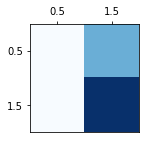

In [87]:
# better tick placement : one per cell and centered

data = board.states
# set some canvas
fig, ax = plt.subplots(figsize=(2,2))
# draw a heatmap
heatmap = ax.pcolor(board.states, cmap=plt.cm.Blues)

# ensure square cells
ax.set_aspect("equal")

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# put labels on top
ax.invert_yaxis()
ax.xaxis.tick_top()


[Text(0, 0, '1'), Text(0, 0, '2')]

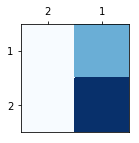

In [88]:
# set the clues as labels 

data = board.states
# set some canvas
fig, ax = plt.subplots(figsize=(2,2))
# draw a heatmap
heatmap = ax.pcolor(board.states, cmap=plt.cm.Blues)

# ensure square cells
ax.set_aspect("equal")

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# put labels on top
ax.invert_yaxis()
ax.xaxis.tick_top()

# set labels
column_labels = clues['cols']
row_labels = clues['rows']

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)


### annotate fillers with x

Text(1.5, 0.5, 'X')

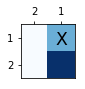

In [89]:
# annotate fillers with x

data = board.states
# set some canvas
fig, ax = plt.subplots(figsize=(1,1))
# draw a heatmap
heatmap = ax.pcolor(board.states, cmap=plt.cm.Blues)

# ensure square cells
ax.set_aspect("equal")

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# put labels on top
ax.invert_yaxis()
ax.xaxis.tick_top()

# set labels
column_labels = clues['cols']
row_labels = clues['rows']

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)


# annotate fillers
# must compute the coordinates from index
plt.text(1.5, 0.5, 'X', 
         verticalalignment='center_baseline',
         horizontalalignment='center',
         fontsize='xx-large')


In [90]:
# filter fillers' coordinates as a list of (x,y)
# enumerate add position before each cell
# reshape flatten the list of list to be a single list
[p for p in enumerate(board.states.reshape(4)) ]


[(0, -1), (1, 0), (2, -1), (3, 1)]

In [91]:
# expect cell at pos 1 : row=0 col=1
# 4 is the number of cells in the board (2x2)
[p for (p,v) in enumerate(board.states.reshape(4)) 
        if v==0]


[1]

In [92]:
# expect (col,row) is (1,0) for row=0 col=1
[(p%2,int(p/2)) for (p,v) in enumerate(board.states.reshape(4)) 
        if v==0]

[(1, 0)]

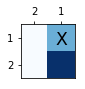

In [93]:
# annotate fillers with x

data = board.states
# set some canvas
fig, ax = plt.subplots(figsize=(1,1))
# draw a heatmap
heatmap = ax.pcolor(board.states, cmap=plt.cm.Blues)

# ensure square cells
ax.set_aspect("equal")

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# put labels on top
ax.invert_yaxis()
ax.xaxis.tick_top()

# set labels
column_labels = clues['cols']
row_labels = clues['rows']

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)


# annotate fillers
# expect (col,row) is (1,0) for row=0 col=1
w = board.width
h = board.height
nc = board.width * board.height
fillers_coordinates = [(p%w + 0.5, int(p/h) + 0.5) 
                       for (p,v) in enumerate(board.states.reshape(nc)) 
                       if v==0]
# place an X in the center of each coordinate
for coord in fillers_coordinates:
    plt.text(coord[0], coord[1], 'X', 
         verticalalignment='center_baseline',
         horizontalalignment='center',
         fontsize='xx-large')


### change color of filler for white

In [94]:
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
cdict = cm.get_cmap('Blues')._segmentdata
cdict

{'red': [(0.0, 0.9686274509803922, 0.9686274509803922),
  (0.125, 0.8705882352941177, 0.8705882352941177),
  (0.25, 0.7764705882352941, 0.7764705882352941),
  (0.375, 0.6196078431372549, 0.6196078431372549),
  (0.5, 0.4196078431372549, 0.4196078431372549),
  (0.625, 0.25882352941176473, 0.25882352941176473),
  (0.75, 0.12941176470588237, 0.12941176470588237),
  (0.875, 0.03137254901960784, 0.03137254901960784),
  (1.0, 0.03137254901960784, 0.03137254901960784)],
 'green': [(0.0, 0.984313725490196, 0.984313725490196),
  (0.125, 0.9215686274509803, 0.9215686274509803),
  (0.25, 0.8588235294117647, 0.8588235294117647),
  (0.375, 0.792156862745098, 0.792156862745098),
  (0.5, 0.6823529411764706, 0.6823529411764706),
  (0.625, 0.5725490196078431, 0.5725490196078431),
  (0.75, 0.44313725490196076, 0.44313725490196076),
  (0.875, 0.3176470588235294, 0.3176470588235294),
  (1.0, 0.18823529411764706, 0.18823529411764706)],
 'blue': [(0.0, 1.0, 1.0),
  (0.125, 0.9686274509803922, 0.9686274509803

In [95]:
cdict = {'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
  (0.5, 1.0, 1.0),
  (1.0, 0.03137254901960784, 0.03137254901960784)],
 'green': [(0.0, 0.792156862745098, 0.792156862745098),
  (0.5, 1.0, 1.0),
  (1.0, 0.18823529411764706, 0.18823529411764706)],
 'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
  (0.5, 1.0, 1.0),
  (1.0, 0.4196078431372549, 0.4196078431372549)],
 'alpha': [(0.0, 1.0, 1.0),
  (0.5, 1.0, 1.0),
  (1.0, 1.0, 1.0)]}
nono_cmap = LinearSegmentedColormap('nono', cdict)
cdict

{'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
  (0.5, 1.0, 1.0),
  (1.0, 0.03137254901960784, 0.03137254901960784)],
 'green': [(0.0, 0.792156862745098, 0.792156862745098),
  (0.5, 1.0, 1.0),
  (1.0, 0.18823529411764706, 0.18823529411764706)],
 'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
  (0.5, 1.0, 1.0),
  (1.0, 0.4196078431372549, 0.4196078431372549)],
 'alpha': [(0.0, 1.0, 1.0), (0.5, 1.0, 1.0), (1.0, 1.0, 1.0)]}

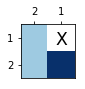

In [96]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

cdict = {'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
  (0.5, 1.0, 1.0),
  (1.0, 0.03137254901960784, 0.03137254901960784)],
 'green': [(0.0, 0.792156862745098, 0.792156862745098),
  (0.5, 1.0, 1.0),
  (1.0, 0.18823529411764706, 0.18823529411764706)],
 'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
  (0.5, 1.0, 1.0),
  (1.0, 0.4196078431372549, 0.4196078431372549)],
 'alpha': [(0.0, 1.0, 1.0),
  (0.5, 1.0, 1.0),
  (1.0, 1.0, 1.0)]}
nono_cmap = LinearSegmentedColormap('nono', cdict)
cdict

# annotate fillers with x

data = board.states
# set some canvas
fig, ax = plt.subplots(figsize=(1,1))
# draw a heatmap
heatmap = ax.pcolor(board.states, cmap=nono_cmap)

# ensure square cells
ax.set_aspect("equal")

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# put labels on top
ax.invert_yaxis()
ax.xaxis.tick_top()

# set labels
column_labels = clues['cols']
row_labels = clues['rows']

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)


# annotate fillers
# expect (col,row) is (1,0) for row=0 col=1
w = board.width
h = board.height
nc = board.width * board.height
fillers_coordinates = [(p%w + 0.5, int(p/w) + 0.5) 
                       for (p,v) in enumerate(board.states.reshape(nc)) 
                       if v==0]
# place an X in the center of each coordinate
for coord in fillers_coordinates:
    plt.text(coord[0], coord[1], 'X', 
         verticalalignment='center_baseline',
         horizontalalignment='center',
         fontsize='xx-large')


In [97]:
# reset vars from all previous tests
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [98]:
from boardutilsv1 import Board, BoardMark
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

class BoardPlotter:
    '''
    Plot the board.
    Requiere %matplotlib inline .
    '''
    cdict = {'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
      (0.5, 1.0, 1.0),
      (1.0, 0.03137254901960784, 0.03137254901960784)],
     'green': [(0.0, 0.792156862745098, 0.792156862745098),
      (0.5, 1.0, 1.0),
      (1.0, 0.18823529411764706, 0.18823529411764706)],
     'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
      (0.5, 1.0, 1.0),
      (1.0, 0.4196078431372549, 0.4196078431372549)],
     'alpha': [(0.0, 1.0, 1.0),
      (0.5, 1.0, 1.0),
      (1.0, 1.0, 1.0)]}
    nono_cmap = LinearSegmentedColormap('nono', cdict)
    
    def __init__(self, a_board):
        self.board = a_board
    
    def show(self):
        data = self.board.states
        clues = self.board.clues
        
        # set some canvas
        fig, ax = plt.subplots(figsize=(1,1))
        # draw a heatmap
        heatmap = ax.pcolor(data, cmap=self.nono_cmap)

        # ensure square cells
        ax.set_aspect("equal")

        # put the major ticks at the middle of each cell
        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

        # put labels on top
        ax.invert_yaxis()
        ax.xaxis.tick_top()

        # set labels
        column_labels = self.board.clues['cols']
        row_labels = self.board.clues['rows']

        ax.set_xticklabels(column_labels, minor=False)
        ax.set_yticklabels(row_labels, minor=False)


        # annotate fillers
        # expect (col,row) is (1,0) for row=0 col=1
        w = self.board.width
        h = self.board.height
        nc = self.board.width * self.board.height
        fillers_coordinates = [(p%w + 0.5, int(p/w) + 0.5) 
                               for (p,v) in enumerate(data.reshape(nc)) 
                               if v==0]
        # place an X in the center of each coordinate
        for coord in fillers_coordinates:
            plt.text(coord[0], coord[1], 'X', 
                 verticalalignment='center_baseline',
                 horizontalalignment='center',
                 fontsize='xx-large')

        plt.show()

### basic check with mini board

cols: 2 1
rows:
1
2
[['.' '.']
 ['.' '.']]


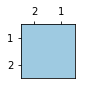

cols: 2 1
rows:
1
2
[['.' 'x']
 ['.' 'o']]


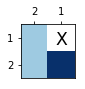

In [99]:
# clues for mini game
clues1 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
board1 = Board(clues1)
plotter1 = BoardPlotter(board1)
board1.prettyprint()
plotter1.show()

board1.mark(0, 1, BoardMark.FILLER) 
board1.mark(1, 1, BoardMark.BLACK) 
board1.prettyprint()
plotter1.show()

### basic check with more complex board

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


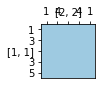

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' 'o' '.' '.']
 ['.' '.' 'o' '.' '.']
 ['.' '.' 'x' '.' '.']
 ['.' '.' 'o' '.' '.']
 ['o' 'o' 'o' 'o' 'o']]


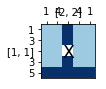

In [100]:
clues1 = {
    'rows': [1, 3, [1,1], 3, 5],
    'cols': [1, 4, [2,2], 4, 1]
}
board1 = Board(clues1)
plotter1 = BoardPlotter(board1)
board1.prettyprint()
plotter1.show()

# row 4 is ooooo
board1.mark(4, 0, BoardMark.BLACK) 
board1.mark(4, 1, BoardMark.BLACK) 
board1.mark(4, 2, BoardMark.BLACK) 
board1.mark(4, 3, BoardMark.BLACK) 
board1.mark(4, 4, BoardMark.BLACK) 
# col 2 is ooxoo
board1.mark(0, 2, BoardMark.BLACK) 
board1.mark(1, 2, BoardMark.BLACK) 
board1.mark(2, 2, BoardMark.FILLER) 
board1.mark(3, 2, BoardMark.BLACK) 
board1.mark(4, 2, BoardMark.BLACK) 

board1.prettyprint()
plotter1.show()

remarks:
- size of figure must depend on board dimensions
- need a to take care of split clues: avoid [] and print cols clues over multiple lines
```
clues = {
    'rows': [1, 3, [1,1], 3, 5], -> [1, 3, "1 1", 3, 5]
    'cols': [1, 4, [2,2], 4, 1]  -> [1, 4, "2\n2", 4, 1]
}
```

In [102]:
clues = {
    'rows': [1, 3, [1,1], 3, 5],
    'cols': [1, 4, [2,2], 4, 1]
}

In [103]:
def row_clue_to_label(v):
    print(v)
    return str(v) if not isinstance(v, list) else ' '.join(map(str,v))
list(map(row_clue_to_label, clues['rows']))

1
3
[1, 1]
3
5


['1', '3', '1 1', '3', '5']

In [104]:
# need str to be able to join

In [105]:
def col_clue_to_label(v):
    print(v)
    return str(v) if not isinstance(v, list) else '\n'.join(map(str,v))
list(map(col_clue_to_label, clues['cols']))

1
4
[2, 2]
4
1


['1', '4', '2\n2', '4', '1']

In [107]:
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [108]:
from boardutilsv1 import Board, BoardMark
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

class BoardPlotter:
    '''
    Plot the board.
    Requiere %matplotlib inline .
    '''
    cdict = {'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
      (0.5, 1.0, 1.0),
      (1.0, 0.03137254901960784, 0.03137254901960784)],
     'green': [(0.0, 0.792156862745098, 0.792156862745098),
      (0.5, 1.0, 1.0),
      (1.0, 0.18823529411764706, 0.18823529411764706)],
     'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
      (0.5, 1.0, 1.0),
      (1.0, 0.4196078431372549, 0.4196078431372549)],
     'alpha': [(0.0, 1.0, 1.0),
      (0.5, 1.0, 1.0),
      (1.0, 1.0, 1.0)]}
    nono_cmap = LinearSegmentedColormap('nono', cdict)
    
    def __init__(self, a_board):
        self.board = a_board
        clues = self.board.clues
      
        def row_clue_to_label(v):
            #print(v)
            return str(v) if not isinstance(v, list) else ' '.join(map(str,v))
        self.rows_labels = list(map(row_clue_to_label, clues['rows']))

        def col_clue_to_label(v):
            #print(v)
            return str(v) if not isinstance(v, list) else '\n'.join(map(str,v))
        self.cols_labels = list(map(col_clue_to_label, clues['cols']))
    
    def show(self):
        # WARNING :  the board is row col, while the fig is col row
        data = self.board.states
        w = self.board.width
        h = self.board.height
        nc = self.board.width * self.board.height
        
        # set some canvas
        # guess the figure size 
        # 1 fits 2 cells
        # 2 fits 5 cols
        figw = int(w/2) 
        figh = int(h/2) 
        fig, ax = plt.subplots(figsize=(figw,figh))
        # draw a heatmap
        heatmap = ax.pcolor(data, cmap=self.nono_cmap)

        # ensure square cells
        ax.set_aspect("equal")

        # put the major ticks at the middle of each cell
        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

        # put labels on top
        ax.invert_yaxis()
        ax.xaxis.tick_top()

        # set labels
        column_labels = self.board.clues['cols']
        row_labels = self.board.clues['rows']

        ax.set_xticklabels(self.cols_labels, minor=False)
        ax.set_yticklabels(self.rows_labels, minor=False)


        # annotate fillers
        # expect (col,row) is (1,0) for row=0 col=1
        fillers_coordinates = [(p%w + 0.5, int(p/w) + 0.5) 
                               for (p,v) in enumerate(data.reshape(nc)) 
                               if v==0]
        # place an X in the center of each coordinate
        for coord in fillers_coordinates:
            plt.text(coord[0], coord[1], 'x', 
                 verticalalignment='center',
                 horizontalalignment='center',
                 fontsize='xx-large')

        plt.show()

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


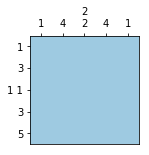

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' 'o' '.' '.']
 ['.' '.' 'o' '.' '.']
 ['.' '.' 'x' '.' '.']
 ['.' '.' 'o' '.' '.']
 ['o' 'o' 'o' 'o' 'o']]


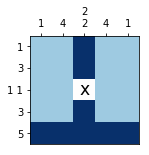

In [109]:
clues1 = {
    'rows': [1, 3, [1,1], 3, 5],
    'cols': [1, 4, [2,2], 4, 1]
}
board1 = Board(clues1)
plotter1 = BoardPlotter(board1)
board1.prettyprint()
plotter1.show()

# row 4 is ooooo
board1.mark(4, 0, BoardMark.BLACK) 
board1.mark(4, 1, BoardMark.BLACK) 
board1.mark(4, 2, BoardMark.BLACK) 
board1.mark(4, 3, BoardMark.BLACK) 
board1.mark(4, 4, BoardMark.BLACK) 
# col 2 is ooxoo
board1.mark(0, 2, BoardMark.BLACK) 
board1.mark(1, 2, BoardMark.BLACK) 
board1.mark(2, 2, BoardMark.FILLER) 
board1.mark(3, 2, BoardMark.BLACK) 
board1.mark(4, 2, BoardMark.BLACK) 

board1.prettyprint()
plotter1.show()

In [110]:
### check one by one

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


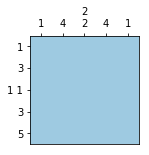

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


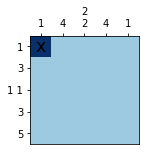

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


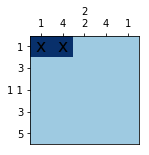

In [111]:
clues1 = {
    'rows': [1, 3, [1,1], 3, 5],
    'cols': [1, 4, [2,2], 4, 1]
}
board1 = Board(clues1)
plotter1 = BoardPlotter(board1)
board1.prettyprint()
plotter1.show()

# WARNING confusion when only one type filler/black 
# fiw min and lmax
board1.mark(0, 0, BoardMark.FILLER) 
board1.prettyprint()
plotter1.show()
board1.mark(0, 1, BoardMark.FILLER) 
board1.prettyprint()
plotter1.show()


In [112]:
# WARNING confusion when only one type filler/black 
# add value range to avoid filler is mistaken for black 
# bacuase the range of actual values is -1 0

In [115]:
from boardutilsv1 import Board, BoardMark
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

class BoardPlotter:
    '''
    Plot the board
    Requiere %matplotlib inline .
    '''
    cdict = {'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
      (0.5, 1.0, 1.0),
      (1.0, 0.03137254901960784, 0.03137254901960784)],
     'green': [(0.0, 0.792156862745098, 0.792156862745098),
      (0.5, 1.0, 1.0),
      (1.0, 0.18823529411764706, 0.18823529411764706)],
     'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
      (0.5, 1.0, 1.0),
      (1.0, 0.4196078431372549, 0.4196078431372549)],
     'alpha': [(0.0, 1.0, 1.0),
      (0.5, 1.0, 1.0),
      (1.0, 1.0, 1.0)]}
    nono_cmap = LinearSegmentedColormap('nono', cdict)
    
    def __init__(self, a_board):
        self.board = a_board
        clues = self.board.clues
      
        def row_clue_to_label(v):
            #print(v)
            return str(v) if not isinstance(v, list) else ' '.join(map(str,v))
        self.rows_labels = list(map(row_clue_to_label, clues['rows']))

        def col_clue_to_label(v):
            #print(v)
            return str(v) if not isinstance(v, list) else '\n'.join(map(str,v))
        self.cols_labels = list(map(col_clue_to_label, clues['cols']))
    
    def show(self):
        # WARNING :  the board is row col, while the fig is col row
        data = self.board.states
        w = self.board.width
        h = self.board.height
        nc = self.board.width * self.board.height
        
        # set some canvas
        # guess the figure size 
        # 1 fits 2 cells
        # 2 fits 5 cols
        figw = int(w/2) 
        figh = int(h/2) 
        fig, ax = plt.subplots(figsize=(figw,figh))
        # draw a heatmap
        # ensure value range is -1 to 1
        heatmap = ax.pcolor(data, cmap=self.nono_cmap, vmin=-1, vmax=1)

        # ensure square cells
        ax.set_aspect("equal")

        # put the major ticks at the middle of each cell
        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

        # put labels on top
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        

        # set labels
        column_labels = self.board.clues['cols']
        row_labels = self.board.clues['rows']

        ax.set_xticklabels(self.cols_labels, minor=False)
        ax.set_yticklabels(self.rows_labels, minor=False)


        # annotate fillers
        # expect (col,row) is (1,0) for row=0 col=1
        fillers_coordinates = [(p%w + 0.5, int(p/w) + 0.5) 
                               for (p,v) in enumerate(data.reshape(nc)) 
                               if v==0]
        # place an X in the center of each coordinate
        for coord in fillers_coordinates:
            plt.text(coord[0], coord[1], 'x', 
                 verticalalignment='center',
                 horizontalalignment='center',
                 fontsize='xx-large')

        plt.show()

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


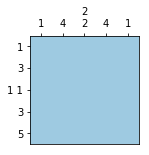

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


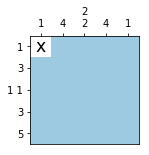

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


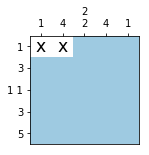

In [116]:
clues1 = {
    'rows': [1, 3, [1,1], 3, 5],
    'cols': [1, 4, [2,2], 4, 1]
}
board1 = Board(clues1)
plotter1 = BoardPlotter(board1)
board1.prettyprint()
plotter1.show()

board1.mark(0, 0, BoardMark.FILLER) 
board1.prettyprint()
plotter1.show()
board1.mark(0, 1, BoardMark.FILLER) 
board1.prettyprint()
plotter1.show()

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


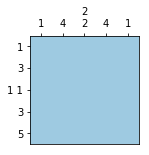

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


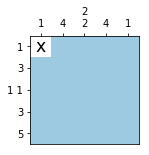

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


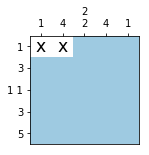

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' 'o' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


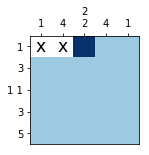

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' 'o' 'o' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


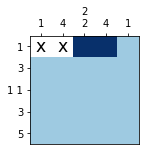

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' 'o' 'o' '.']
 ['x' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


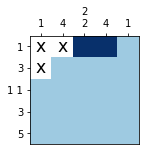

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' 'o' 'o' '.']
 ['x' '.' '.' '.' '.']
 ['x' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


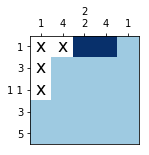

In [117]:
clues1 = {
    'rows': [1, 3, [1,1], 3, 5],
    'cols': [1, 4, [2,2], 4, 1]
}
board1 = Board(clues1)
plotter1 = BoardPlotter(board1)
board1.prettyprint()
plotter1.show()

board1.mark(0, 0, BoardMark.FILLER) 
board1.prettyprint()
plotter1.show()
board1.mark(0, 1, BoardMark.FILLER) 
board1.prettyprint()
plotter1.show()
board1.mark(0, 2, BoardMark.BLACK) 
board1.prettyprint()
plotter1.show()
board1.mark(0, 3, BoardMark.BLACK) 
board1.prettyprint()
plotter1.show()
board1.mark(1, 0, BoardMark.FILLER) 
board1.prettyprint()
plotter1.show()
board1.mark(2, 0, BoardMark.FILLER) 
board1.prettyprint()
plotter1.show()

### check non square matrix

cols: 1 3 2 3 1
rows:
1
3
[1, 1]
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


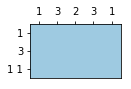

cols: 1 3 2 3 1
rows:
1
3
[1, 1]
[['.' 'o' '.' 'o' '.']
 ['.' 'o' '.' 'o' '.']
 ['x' 'o' 'x' 'o' 'x']]


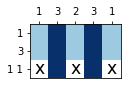

In [118]:
clues1 = {
    'rows': [1, 3, [1,1]],
    'cols': [1, 3, 2, 3, 1]
}
board1 = Board(clues1)
plotter1 = BoardPlotter(board1)
board1.prettyprint()
plotter1.show()

# col 2 is ooo
board1.mark(0, 1, BoardMark.BLACK) 
board1.mark(1, 1, BoardMark.BLACK) 
board1.mark(2, 1, BoardMark.BLACK) 
# col 3 is ooo
board1.mark(0, 3, BoardMark.BLACK) 
board1.mark(1, 3, BoardMark.BLACK) 
board1.mark(2, 3, BoardMark.BLACK) 
# row 2 is xoxox
board1.mark(2, 0, BoardMark.FILLER) 
board1.mark(2, 2, BoardMark.FILLER) 
board1.mark(2, 4, BoardMark.FILLER) 

board1.prettyprint()
plotter1.show()


# TODO asserts

# TODO animate

```
%matplotlib qt
    plt.show()
    #fig.show()
    #p, = plt.plot(data)
    #ptint(p)
    #plt.draw()
    #plt.pause(0.01)
    #plt.clf()
    #data[1,1] = 1
    #p.set_data(1,1,1)
    #plt.draw()
    #plt.pause(0.0001)
    #plt.clf()
    fig.canvas.draw() # Draws the image to the screen
    plt.pause(1) # Delay in seconds
    data[1,1] = 1
    # struggled with set_data
    heatmap = ax.pcolor(data, cmap=my_cmap) 
    fig.canvas.draw() # Draws the image to the screen
    
    #fig.savefig(output, format="png")
```